# __Built-enviornment-conditions__

### -Here is what the data looks like for enviornment conditions

In [275]:
import pandas as pd
file = pd.read_csv("built-enviornment-conditions.csv")
file

,Neighborhood,Sector #,Population (2010),Land Area (acres),Approx. Total # Parcels (2010),Approx. Total # Taxable Parcels (2010),Approx. # of Structures (2010),Approx. # Unoccupied Parcels (2010),% Good / Excellent Condition Buildings (2009),% Average Condition Buildings (2009),...,$ Residential Bldg. Permits (2010),# Commercial Bldg. Permits (2010),$ Commercial Bldg. Permits (2010),# Code Violations (2010),% of all Bldgs. w/ Code Violations (2010),# Condemned Structures (2010),% of all Bldgs. Condemned (2010),# Demolitions (2010),# Tax Delinquent Prop. (2+ yrs.) (2010),% of Taxable Prop. Delinquent (2010)
0,Allegheny Center,3,933,134.4,67,26,58,15,NaN,NaN,...,$0,6,"$6,314,000",0,0.0%,0,0.0%,0,0,0.0%
1,Allegheny West,3,462,90.2,282,234,176,49,72.0%,22.3%,...,"$30,784",6,"$795,300",3,1.7%,1,0.6%,0,3,1.3%
2,Allentown,6,"2,500",188.8,"1,550","1,402","1,283",334,2.5%,86.9%,...,"$349,708",1,"$350,000",175,13.6%,30,2.3%,16,287,20.5%
3,Arlington,7,"1,869",300.8,"1,049",950,"1,034",198,0.3%,97.6%,...,"$159,496",1,"$50,000",130,12.6%,10,1.0%,7,142,14.9%
4,Arlington Heights,7,244,84.5,10,7,13,4,NaN,NaN,...,$0,0,$0,0,0.0%,0,0.0%,0,3,42.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,13,"2,669",259.2,"1,463","1,365",901,187,6.9%,85.6%,...,"$304,522",11,"$2,419,600",56,6.2%,18,2.0%,6,105,7.7%
86,West End,4,254,128.0,384,295,186,156,1.0%,92.2%,...,"$14,754",0,$0,10,5.4%,1,0.5%,3,40,13.6%
87,West Oakland,14,"2,604",137.6,801,540,140,82,0.6%,89.7%,...,"$63,786",24,"$9,080,856",50,35.7%,1,0.7%,0,92,17.0%
88,Westwood,4,"3,066",442.9,"1,581","1,487","1,391",278,22.7%,76.4%,...,"$415,770",1,"$19,500",25,1.8%,4,0.3%,1,65,4.4%


### -The data below has shown that the top 10 neighborhood where have the higher percentage on both good and average condition buildings.

In [379]:
df = pd.read_csv("built-enviornment-conditions.csv")
df[u'% Good / Excellent Condition Buildings (2009)'] = df[u'% Good / Excellent Condition Buildings (2009)'].str.strip('%').astype(float)/100
df[u'% Average Condition Buildings (2009)'] = df[u'% Average Condition Buildings (2009)'].str.strip('%').astype(float)/100
df['%Average on Good&Average Condition Buildings'] = df[['% Good / Excellent Condition Buildings (2009)', '% Average Condition Buildings (2009)']].mean(axis=1)
df
newdata = df.sort_values("% Good / Excellent Condition Buildings (2009)", ascending=False).head(20)
df1 = newdata.loc[:,['Neighborhood','% Good / Excellent Condition Buildings (2009)','% Average Condition Buildings (2009)','%Average on Good&Average Condition Buildings']]
df1
condition = df1.sort_values("%Average on Good&Average Condition Buildings", ascending=False).head(15)
condition

,Neighborhood,% Good / Excellent Condition Buildings (2009),% Average Condition Buildings (2009),%Average on Good&Average Condition Buildings
75,Squirrel Hill North,0.176,0.824,0.5000
65,Regent Square,0.164,0.836,0.5000
58,Oakwood,0.203,0.792,0.4975
67,Shadyside,0.139,0.856,0.4975
39,Highland Park,0.136,0.858,0.4970
54,New Homestead,0.135,0.858,0.4965
89,Windgap,0.148,0.844,0.4960
88,Westwood,0.227,0.764,0.4955
55,North Oakland,0.154,0.819,0.4865
33,Friendship,0.178,0.791,0.4845


### -The data table below has shown that the top 10 neighborhood that have the least population density.

In [394]:
df = pd.read_csv("built-enviornment-conditions.csv")
def con(column):
    column = column.replace(',', '')
    column = int(column)
    return column
df['Population (2010)'] = df['Population (2010)'].map(con)
df
SquareM = df['Land Area (acres)'].str.replace(',', '').astype(float)*0.0015625
df['Population Density'] = df['Population (2010)']/SquareM
df2 = df.sort_values("Population Density", ascending=True).head(10)
density = df2.loc[:,['Neighborhood','Population (2010)','Land Area (acres)','Population Density','Sector #']]
density

,Neighborhood,Population (2010),Land Area (acres),Population Density,Sector #
21,Chateau,11,245.1,28.722970,3
70,South Shore,19,135.7,89.609433,16
37,Hays,362,"1,120.0",206.857143,8
77,St. Clair,209,198.4,674.193548,7
56,North Shore,303,193.9,1000.103146,16
79,Strip District,616,389.1,1013.209972,13
31,Fairywood,1002,620.2,1033.989036,4
54,New Homestead,990,508.2,1246.753247,8
86,West End,254,128.0,1270.000000,4
30,Esplen,301,147.2,1308.695652,4


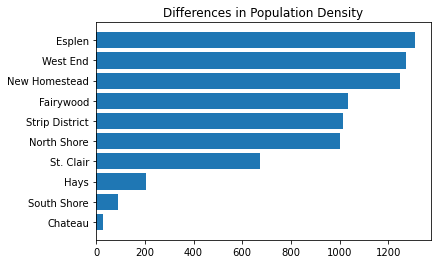

In [377]:
import matplotlib.pyplot as plt
plt.barh(density['Neighborhood'], density['Population Density']) 
plt.title('Differences in Population Density')
plt.show()

### -The data table below has shown that the two neighborhood where they are not only on the higher percentage of good and average condition buildings, also on the top 10 the least population density list.

In [393]:
df3 = pd.merge(condition,density,on='Neighborhood',how='inner')
df3
df3.loc[:,['Neighborhood','% Good / Excellent Condition Buildings (2009)','% Average Condition Buildings (2009)','%Average on Good&Average Condition Buildings','Population Density','Sector #']]

,Neighborhood,% Good / Excellent Condition Buildings (2009),% Average Condition Buildings (2009),%Average on Good&Average Condition Buildings,Population Density,Sector #
0,New Homestead,0.135,0.858,0.4965,1246.753247,8
1,North Shore,0.800,0.125,0.4625,1000.103146,16


### -In coclusion 

##### Out of all the neighborhood in pittsburgh, based on the built environment conditions data table, I would recommend choosing North Shore as the better neighborhood since it has 16 sectors in the area.
##### As well as it has 80% excellent condition buildings in the area with 12.5% average conditon buildings. The average percentage on both excellent and average condition buildings is 46.25%, which is really high since the maximum percentage on all neighborhood is 50%.
##### The population density is on the 5th position on the top 10 least population density data table list, which it has a good amount of population in the area as well as a large land area which does not feel crowded when living in this area